In [19]:
import pandas as pd

In [123]:
df = pd.read_csv('development_sample.csv')

In [124]:
df.head()

,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,1,0,6768.42,0.00,0,0,0,3899
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,0,15000,5937.66,3870.60,0,0,0,3899
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,2,0,5647.77,1463.08,0,0,10,3899
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,0,3594.90,21563.78,0,0,10,3899
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,0,2,2,0,9908.45,0.00,0,0,20,3899


In [125]:
df.drop(['ID', 'customer_id'], axis=1, inplace=True)


In [128]:
#filtering out only approved applications and where we have target values
df = df[df['Application_status'] == 'Approved']
df = df[df['target'].notnull()]


In [131]:
# Display unique values per column
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)


application_date:
['01Feb2010 0:00:00' '02Feb2010 0:00:00' '03Feb2010 0:00:00' ...
 '29Dec2020 0:00:00' '30Dec2020 0:00:00' '31Dec2020 0:00:00']
----------------------------------------
target:
[0. 1.]
----------------------------------------
Application_status:
['Approved']
----------------------------------------
Var1:
[1 2 3 4]
----------------------------------------
Var2:
[ 2.  1.  3. nan]
----------------------------------------
Var3:
['1' '2' nan 'Direct' '3' 'Online']
----------------------------------------
Var4:
[ 7800 11100  2400 11800  7200 15300  7900  9400 11400 10400 12900 10600
  3500  3200 12200  3300  3100 10700 14600 11700 12400  8400 15700  7000
 10800  8000 10900 10200 11200  2100  8900  5900  7700  8700 14500 14100
  9600 15200  4000  4500  9200 16000 10100  3000 12300 13600  2200 13300
  3600 14700 11600  3400  2000 11900 15000  3700  3800 10300  2900 12700
  6900  7300  8200 16600 12100 12800  9000 13200 16200 13700 13100  9800
  7400 16300  8800  1700 14000 170

In [133]:
import numpy as np

# Mapping for Var2
# Original: [ 2.  1.  3. nan]
# Mapping: 1 -> 'Car Loan', 2 -> 'House Renovation', 3 -> 'Short Cash'
var2_mapping = {
    1.0: 'Car Loan',
    2.0: 'House Renovation',
    3.0: 'Short Cash',
    np.nan: np.nan 
}

# Mapping for Var3
# Original: ['1' '2' nan 'Direct' '3' 'Online']
# Mapping: 1 -> 'Direct', 2 -> 'Broker', 3 -> 'Online'
# Handle existing strings and potential string/number codes
var3_mapping = {
    '1': 'Direct',
    1: 'Direct',   # Include integer mapping if applicable
    1.0: 'Direct', # Include float mapping if applicable
    'Direct': 'Direct', # Map existing correct values to themselves

    '2': 'Broker',
    2: 'Broker',
    2.0: 'Broker',
    'Broker': 'Broker',

    '3': 'Online',
    3: 'Online',
    3.0: 'Online',
    'Online': 'Online',

    np.nan: np.nan 
}

# Mapping for Var6
# Original: [1 6 3]
# Mapping: 1 -> 'monthly', 3 -> 'quarterly', 6 -> 'bi-yearly'
var6_mapping = {
    1: 'monthly',
    3: 'quarterly',
    6: 'bi-yearly'
}

# Mapping for Var11
# Original: [5 2 6 4 3 1 7]
# Mapping: 1->Pensioneer, 2->Government, 3->Military, 4->Self Employed, 5->Employee, 6->Business Owner, 7->Unemployed
var11_mapping = {
    1: 'Pensioneer',
    2: 'Government',
    3: 'Military',
    4: 'Self Employed',
    5: 'Employee',
    6: 'Business Owner',
    7: 'Unemployed'
}

# Mapping for Var12
# Original: [nan  5.  2.  4.  6.  3.  1.  7.]
# Mapping: 1->Pensioneer, 2->Government, 3->Military, 4->Self Employed, 5->Employee, 6->Business Owner, 7->Unemployed
var12_mapping = {
    1.0: 'Pensioneer',
    2.0: 'Government',
    3.0: 'Military',
    4.0: 'Self Employed',
    5.0: 'Employee',
    6.0: 'Business Owner',
    7.0: 'Unemployed',
    np.nan: np.nan # Keep NaN as is
}

# Mapping for Var14
# Original: [2 4 1 0 3]
# Mapping: 0->Single, 1->Married, 2->Informal relationship, 3->Divorced, 4->Widowed
var14_mapping = {
    0: 'Single',
    1: 'Married',
    2: 'Informal relationship',
    3: 'Divorced',
    4: 'Widowed'
}

# Print the mappings to verify
print("Var2 Mapping:", var2_mapping)
print("\nVar3 Mapping:", var3_mapping)
print("\nVar6 Mapping:", var6_mapping)
print("\nVar11 Mapping:", var11_mapping)
print("\nVar12 Mapping:", var12_mapping)
print("\nVar14 Mapping:", var14_mapping)

Var2 Mapping: {1.0: 'Car Loan', 2.0: 'House Renovation', 3.0: 'Short Cash', nan: nan}

Var3 Mapping: {'1': 'Direct', 1: 'Direct', 'Direct': 'Direct', '2': 'Broker', 2: 'Broker', 'Broker': 'Broker', '3': 'Online', 3: 'Online', 'Online': 'Online', nan: nan}

Var6 Mapping: {1: 'monthly', 3: 'quarterly', 6: 'bi-yearly'}

Var11 Mapping: {1: 'Pensioneer', 2: 'Government', 3: 'Military', 4: 'Self Employed', 5: 'Employee', 6: 'Business Owner', 7: 'Unemployed'}

Var12 Mapping: {1.0: 'Pensioneer', 2.0: 'Government', 3.0: 'Military', 4.0: 'Self Employed', 5.0: 'Employee', 6.0: 'Business Owner', 7.0: 'Unemployed', nan: nan}

Var14 Mapping: {0: 'Single', 1: 'Married', 2: 'Informal relationship', 3: 'Divorced', 4: 'Widowed'}


In [135]:
if 'Var2' in df.columns:
    df['Var2'] = df['Var2'].map(var2_mapping) 

if 'Var3' in df.columns:

    df['Var3'] = df['Var3'].astype(str).map(var3_mapping) 

if 'Var6' in df.columns:
    df['Var6'] = df['Var6'].map(var6_mapping)

if 'Var11' in df.columns:
    df['Var11'] = df['Var11'].map(var11_mapping)

if 'Var12' in df.columns:
    df['Var12'] = df['Var12'].map(var12_mapping)

if 'Var14' in df.columns:
    df['Var14'] = df['Var14'].map(var14_mapping)


In [137]:
df['application_date'] = pd.to_datetime(df['application_date']).dt.normalize()


In [139]:
df['Var13'] = pd.to_datetime(df['Var13'], format='%d%b%Y', errors='coerce')


In [141]:
df['employment_duration_days'] = (df['application_date'] - df['Var13']).dt.days
df['employment_duration_years'] = df['employment_duration_days'] / 365.25


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36718 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   application_date           36718 non-null  datetime64[ns]
 1   target                     36718 non-null  float64       
 2   Application_status         36718 non-null  object        
 3   Var1                       36718 non-null  int64         
 4   Var2                       35700 non-null  object        
 5   Var3                       35700 non-null  object        
 6   Var4                       36718 non-null  int64         
 7   Var5                       36718 non-null  int64         
 8   Var6                       36718 non-null  object        
 9   Var7                       36718 non-null  float64       
 10  Var8                       16180 non-null  float64       
 11  Var9                       36718 non-null  int64         
 12  Var10    

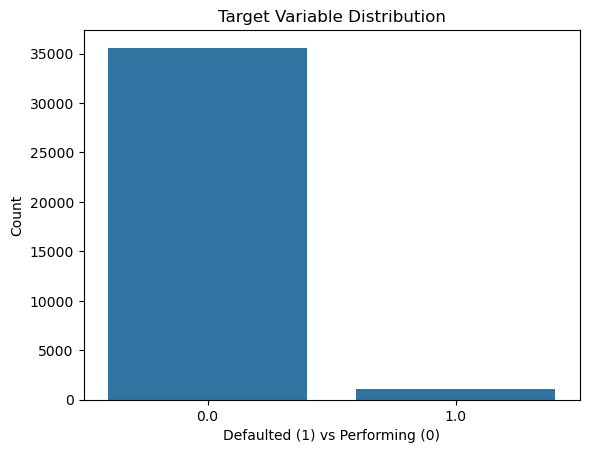

target
0.0    0.969307
1.0    0.030693
Name: proportion, dtype: float64


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Defaulted (1) vs Performing (0)')
plt.ylabel('Count')
plt.show()

print(df['target'].value_counts(normalize=True))


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

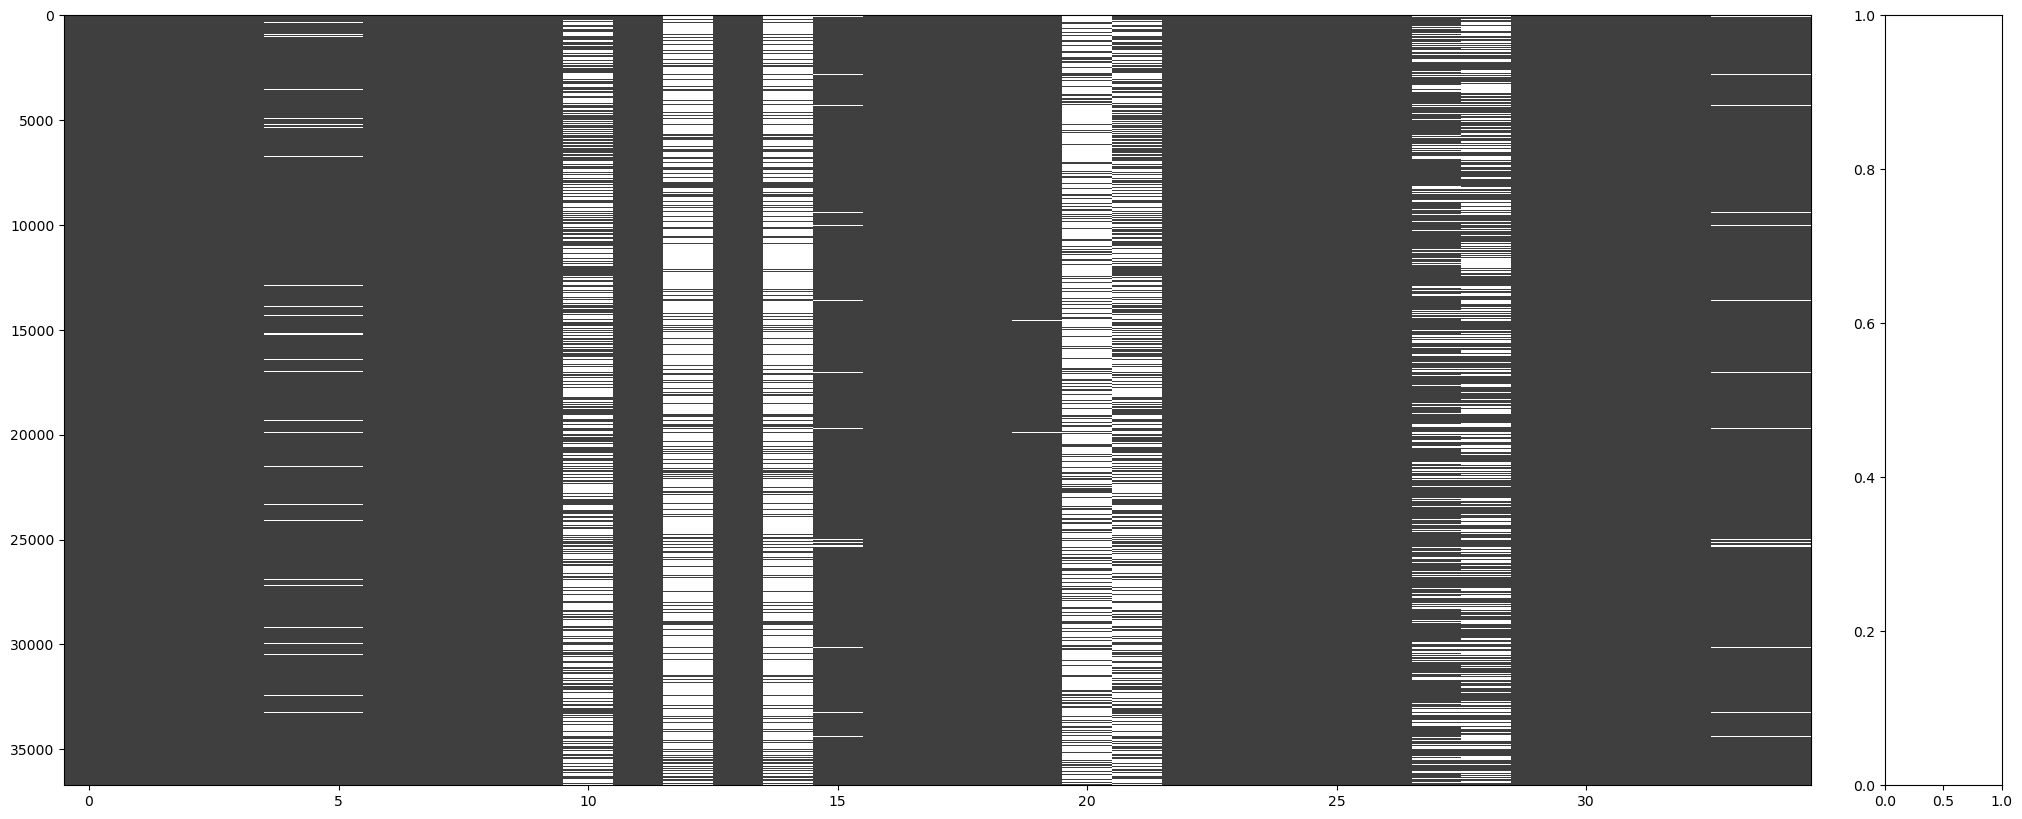

In [147]:
import missingno as msno
msno.matrix(df)


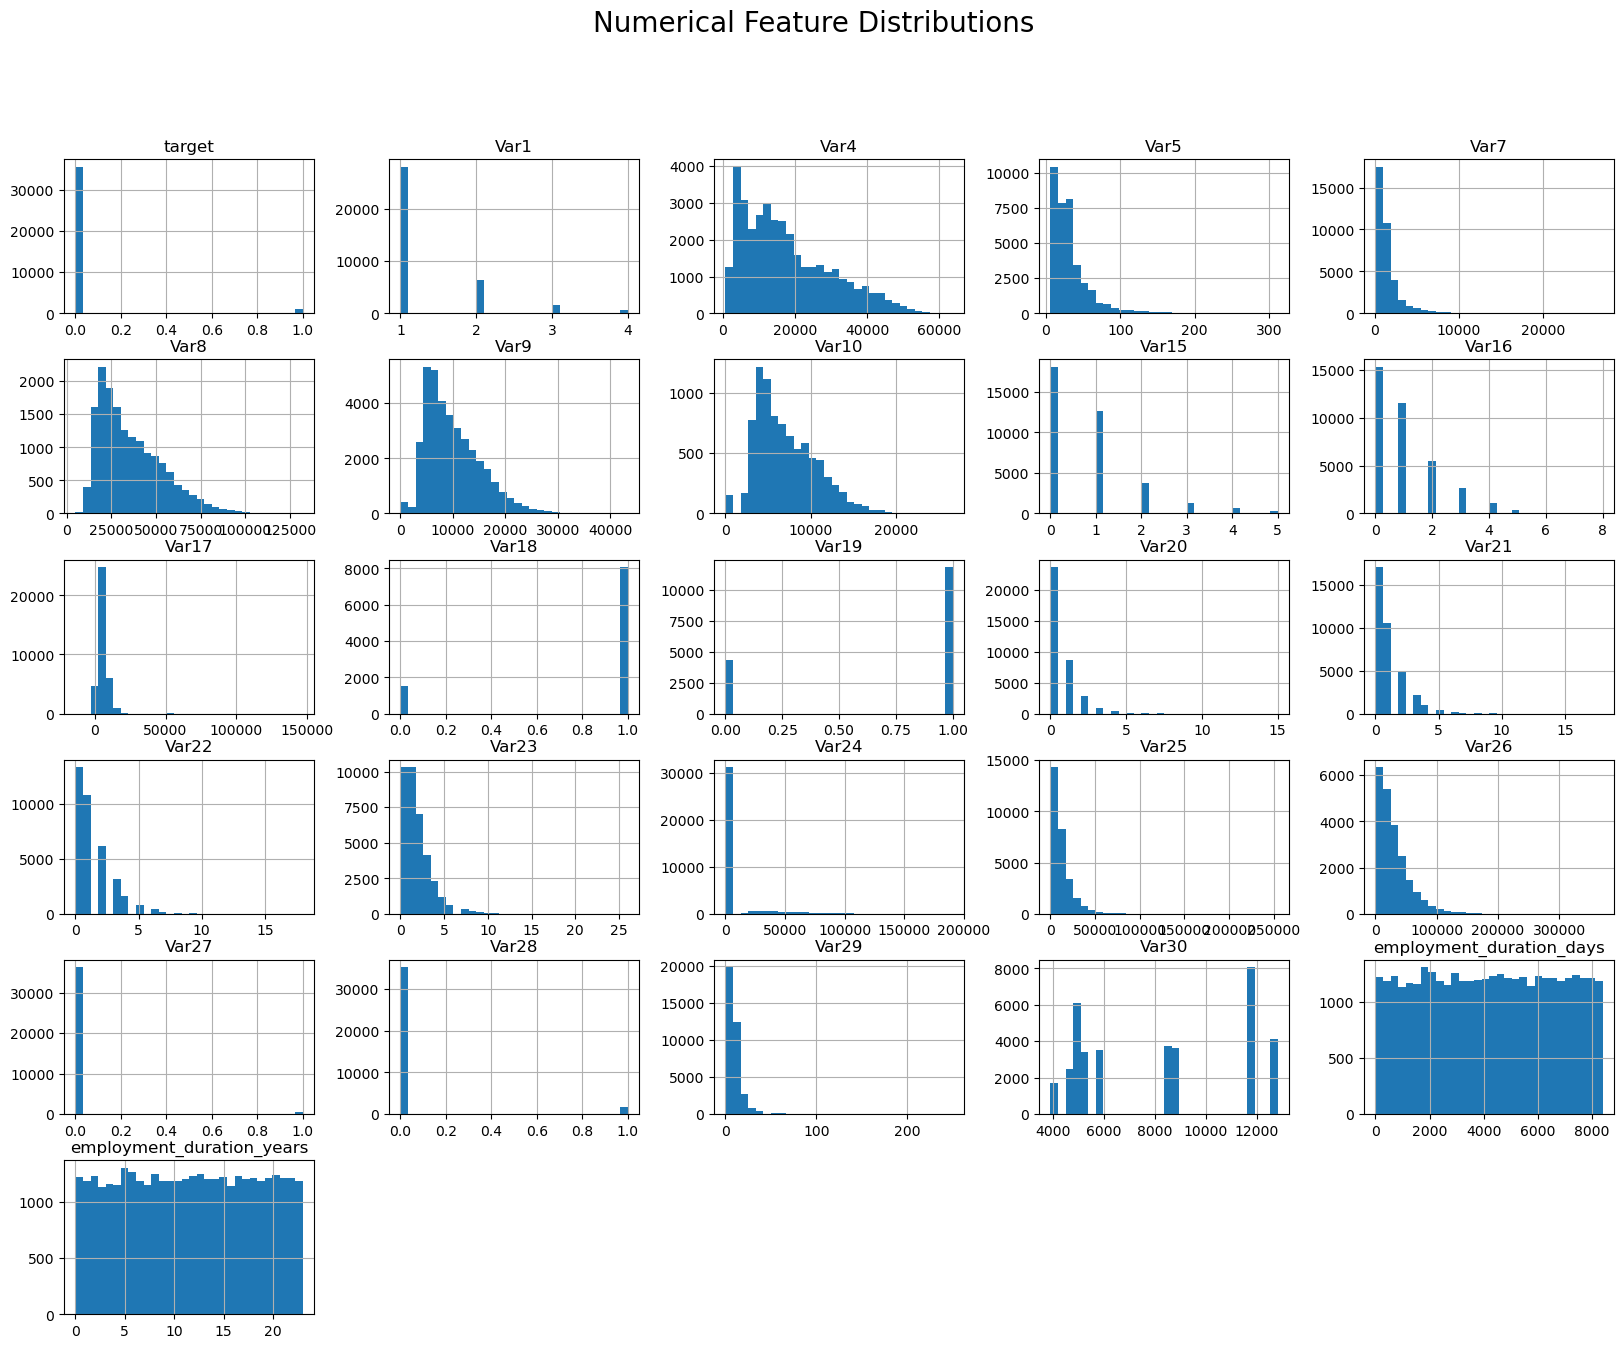

In [152]:
df.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(20, 15))
plt.suptitle('Numerical Feature Distributions', fontsize=20)
plt.show()


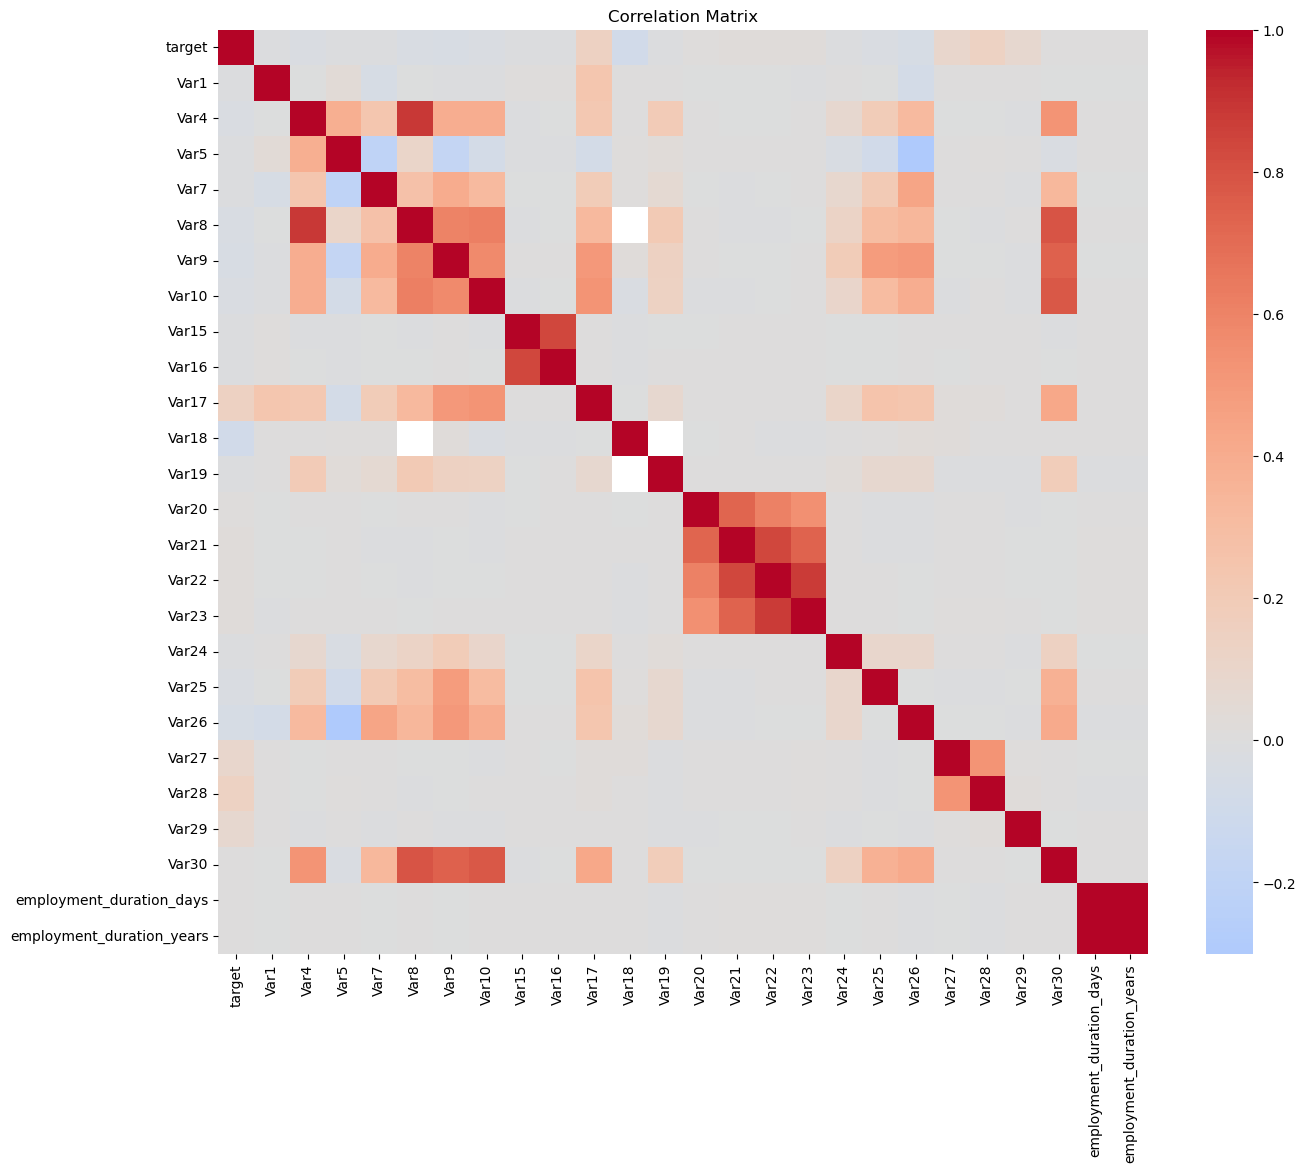

In [153]:
import numpy as np

corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [154]:
cat_vars = df.select_dtypes(include='object').columns.to_list()


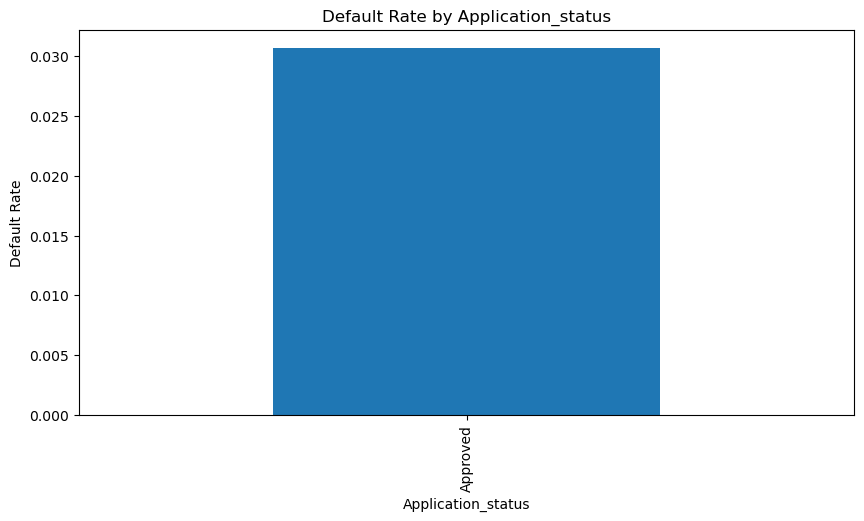

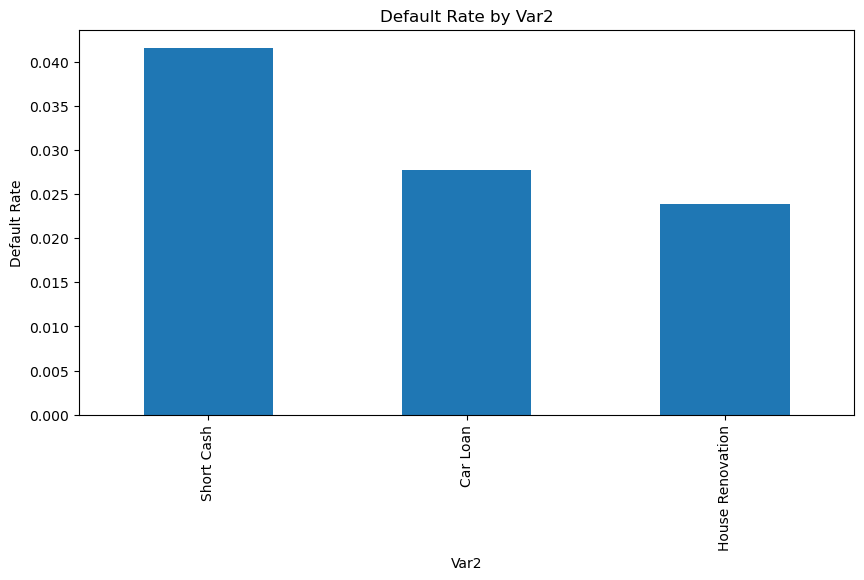

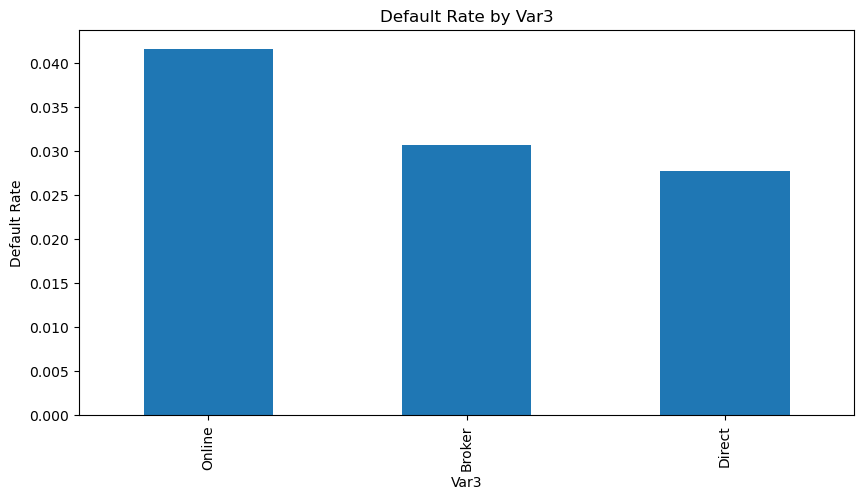

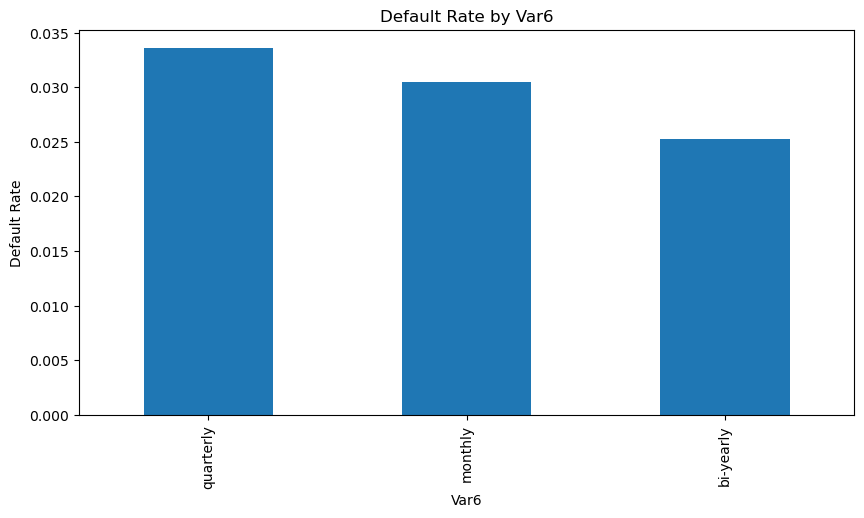

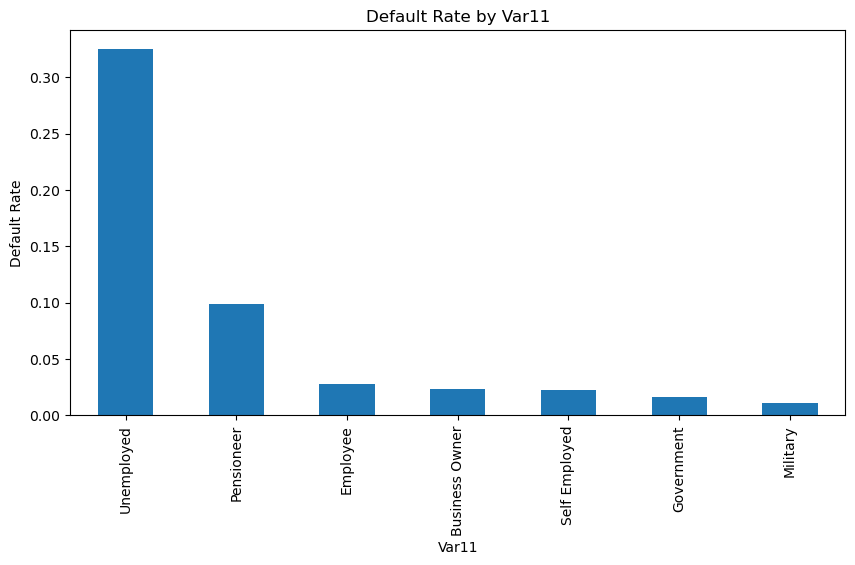

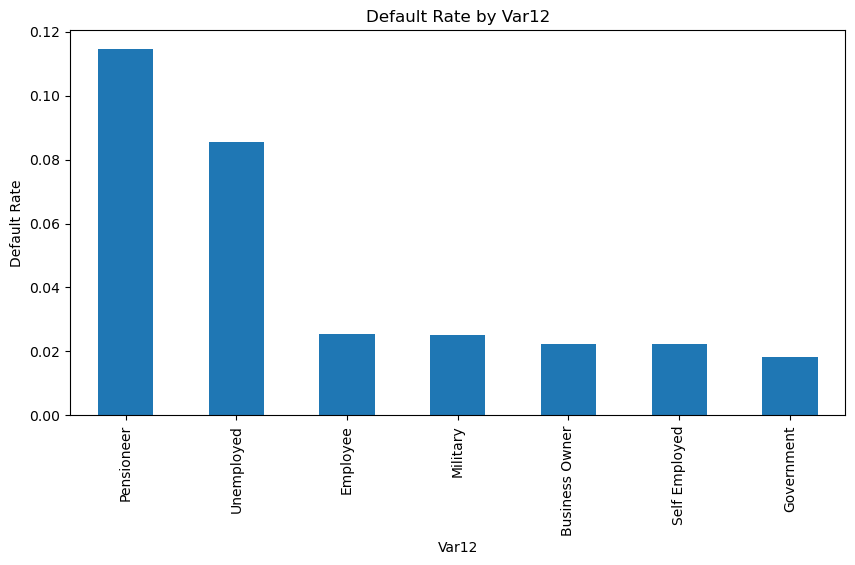

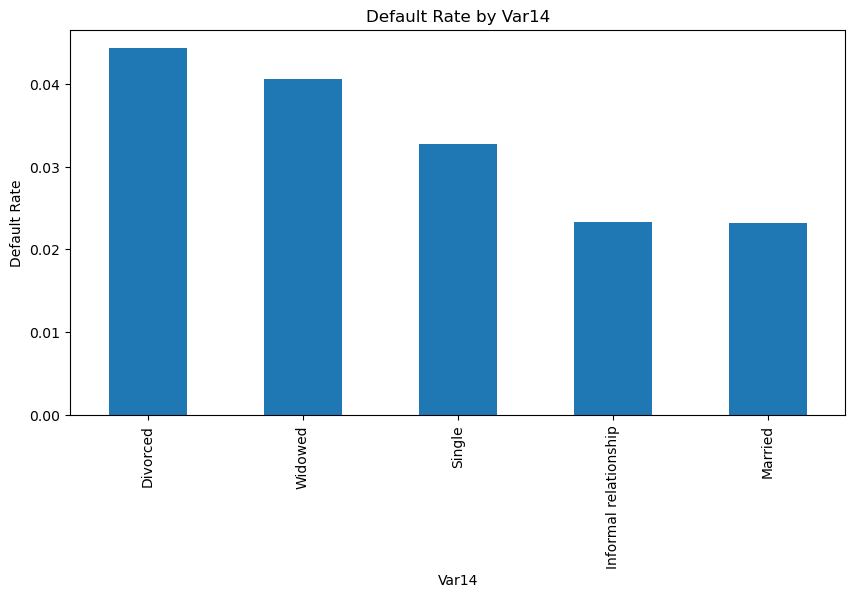

In [155]:
def plot_default_rate_by_category(feature):
    default_rate = df[df['target'].notnull()].groupby(feature)['target'].mean().sort_values(ascending=False)
    default_rate.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Default Rate by {feature}')
    plt.ylabel('Default Rate')
    plt.xlabel(feature)
    plt.show()

for i in cat_vars:
    plot_default_rate_by_category(i)


In [162]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0.0])  


Var12                        0.763740
Var10                        0.763740
Var18                        0.738738
Var19                        0.559344
Var8                         0.559344
Var26                        0.398960
Var25                        0.201563
Var3                         0.027725
Var2                         0.027725
Var13                        0.015360
employment_duration_days     0.015360
employment_duration_years    0.015360
Var17                        0.000872
dtype: float64


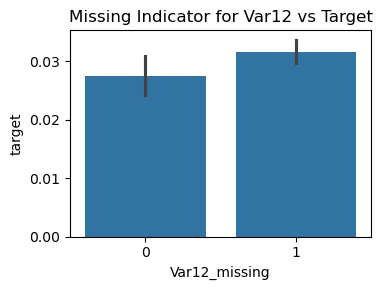

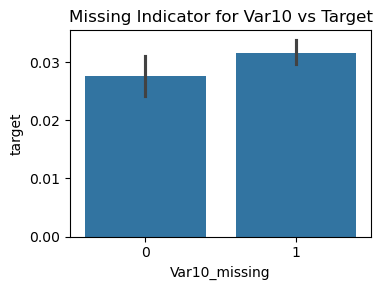

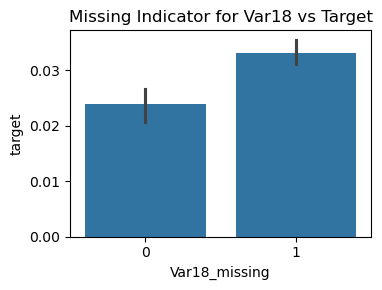

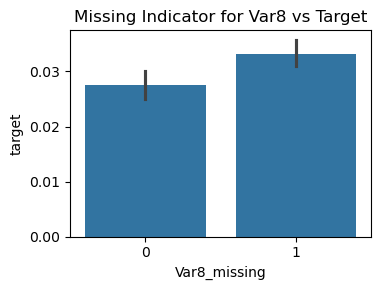

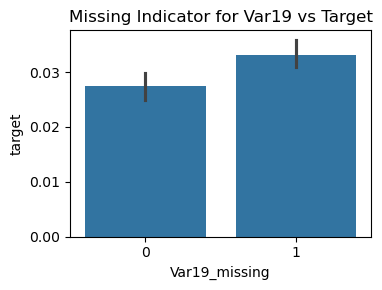

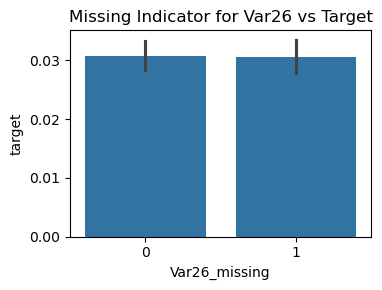

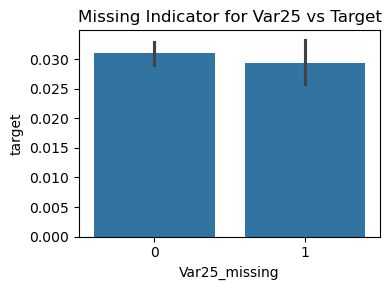

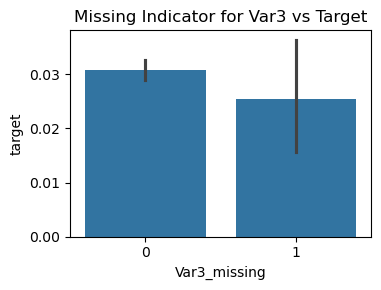

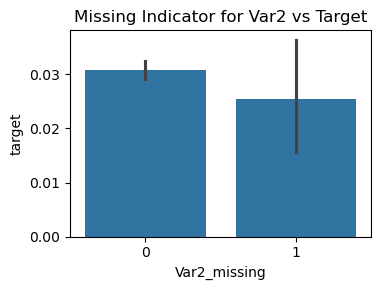

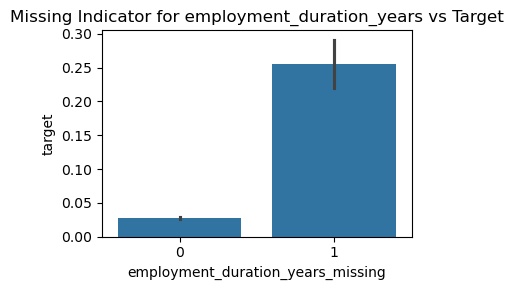

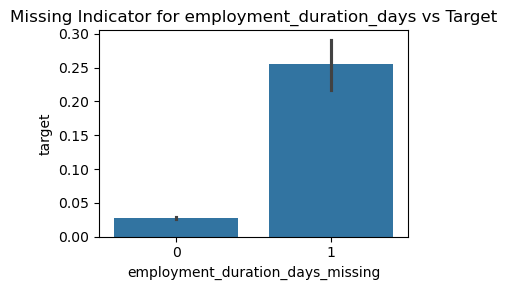

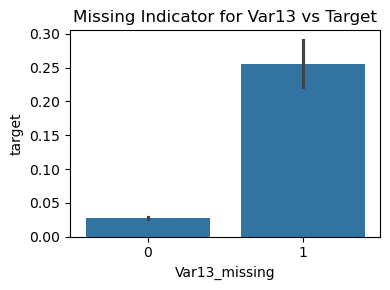

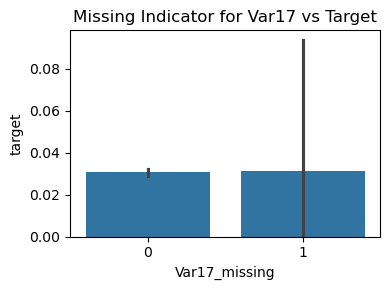

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_to_check = ['Var12', 'Var10', 'Var18', 'Var8', 'Var19', 'Var26','Var25','Var3','Var2','employment_duration_years','employment_duration_days','Var13','Var17']

for var in vars_to_check:
    missing_col = f"{var}_missing"
    df[missing_col] = df[var].isnull().astype(int)

    plt.figure(figsize=(4, 3))
    sns.barplot(x=missing_col, y='target', data=df)
    plt.title(f"Missing Indicator for {var} vs Target")
    plt.tight_layout()
    plt.show()


In [165]:
#what to do with NAs
#VAR10 - Application data: income of second applicant - NA can mean there is no second applicant
#VAR12  - Application data: profession of second applicant - NA can mean there is no second applicant
#var 18 - Property ownership for property renovation - NA can mean no property owned
#var 8 = Value of the goods (car) - maybe no goods/car owned by applicant
#Var 19 - Clasification of the vehicle (Car, Motorbike) maybe NA means no car owned
#Var 26 - Amount on savings account - maybe no savings on applicant account
#Var 25 - Amount on current account - maybe no money on current account
#Var3 - Distribution Channel - no explanation - lets drop this also very few observations
#Var2 - Loan Purpose - no explanation - maybe it can be dropped - few observations
#employment duration calculated by the use of application date, these and Var13 (application date) they all missing at the same places
#Vae13 see row above
#Var17 Spending estimation can be dropped - incredibly low

In [166]:
##handling missing values

In [170]:
df['Var10'].min()

0.0

In [172]:
# Create missing indicator before filling
df['Var10_missing'] = df['Var10'].isnull().astype(int)

# Fill missing with 0 (no second applicant = no extra income)
df['Var10'] = df['Var10'].fillna(0)


In [174]:
df['Var12_missing'].unique()

array([1, 0])

In [176]:
df['Var12_missing'] = df['Var12'].isnull().astype(int)
df['Var12'] = df['Var12'].fillna('No_Second_Applicant')


In [178]:
df['Var18'].unique()

array([ 1., nan,  0.])

In [180]:
df['Var18_missing'] = df['Var18'].isnull().astype(int)

# Impute missing as 0 (not owning property for renovation)
df['Var18'] = df['Var18'].fillna(0)

In [182]:
df['Var8'].unique()

array([    nan,  11200.,  12400.,  23000.,   9900.,  11400.,  12000.,
        14200.,  12100.,  20100.,  18500.,  13000.,  15900.,  16000.,
        21500.,  19200.,  15700.,  18400.,  12700.,  17500.,  14900.,
        17100.,  18200.,  16800.,  10700.,  27000.,  19100.,  14800.,
         9300.,  18000.,  13700.,  16500.,  18600.,  17200.,  19300.,
        16400.,  18700.,  14100.,  21800.,   9700.,  16600.,  22200.,
        13400.,  17300.,  10400.,  19700.,  20600.,  16200.,  25400.,
        14700.,  14300.,  12200.,  28800.,  19400.,  15100.,  17000.,
        29500.,  15600.,  20800.,  21000.,  27500.,  31000.,  12800.,
        23800.,  21200.,  29300.,  11700.,   9600.,  22500.,  13600.,
        18800.,  21700.,  14600.,  18900.,  22700.,  16900.,  11300.,
        24100.,  20500.,  15800.,  11600.,  10900.,  19500.,  15300.,
        24200.,  16300.,  11500.,  22900.,  13200.,  31600.,  11000.,
        29000.,  12500.,  24400.,  17900.,  17700.,  27400.,  17400.,
        12300.,  286

In [184]:
df['Var8_missing'] = df['Var8'].isna().astype(int)
df['Var8'] = df['Var8'].fillna(0)


In [186]:
df['Var19'].unique()

array([nan,  1.,  0.])

In [188]:
##in case of not satisfactory results this could be further investigated
pd.crosstab(df['Var19_missing'],  df['Var11'])

Var11,Business Owner,Employee,Government,Military,Pensioneer,Self Employed,Unemployed
Var19_missing,,,,,,,
0,1501,11226,467,497,373,1941,175
1,1744,14435,592,640,468,2404,255


In [190]:
df['Var19_missing'] = df['Var19'].isna().astype(int)
df['Var19'] = df['Var19'].fillna(0)


In [192]:
df['Var26'].unique()

array([0.0000000e+00, 3.8706000e+03, 1.4630800e+03, ..., 1.7292000e+02,
       1.0800534e+05, 2.5501831e+05])

In [194]:
df['Var26'].min()

0.0

In [196]:
#in case of Var26, nan can mean the person does not have a saving account at all

In [198]:
df['Var26_missing'] = df['Var26'].isna().astype(int)
df['Var26'] = df['Var26'].fillna(0)


In [200]:
df['Var25'].unique()

array([ 6768.42,  5937.66,  5647.77, ..., 18255.34, 10816.79,  9288.87])

In [202]:
df['Var25'].min()

260.36

In [113]:
#Var 25 - maybe the applicant applied for the loan at a new bank and they also needed to set up an account - therefore it shows nan (they did not have account at the time)

In [208]:
df['Var25_missing'] = df['Var25'].isna().astype(int)
df['Var25'] = df['Var25'].fillna(0)


In [210]:
pd.crosstab(df['Var25_missing'],  df['Var2'])

Var2,Car Loan,House Renovation,Short Cash
Var25_missing,,,
0,12638,7441,8449
1,3106,1874,2192


In [212]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0.0])  


Var2                         0.027725
Var3                         0.027725
employment_duration_days     0.015360
employment_duration_years    0.015360
Var13                        0.015360
Var17                        0.000872
dtype: float64


In [214]:
cols_to_drop = [
    'Var2',
    'Var3',
    'employment_duration_days',
    'employment_duration_years',
    'Var13',
    'Var17'
]

df = df.drop(columns=cols_to_drop)


In [220]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent)  


application_date                     0.0
Var18_missing                        0.0
Var25                                0.0
Var26                                0.0
Var27                                0.0
Var28                                0.0
Var29                                0.0
Var30                                0.0
Var12_missing                        0.0
Var10_missing                        0.0
Var8_missing                         0.0
target                               0.0
Var19_missing                        0.0
Var26_missing                        0.0
Var25_missing                        0.0
Var3_missing                         0.0
Var2_missing                         0.0
employment_duration_years_missing    0.0
employment_duration_days_missing     0.0
Var13_missing                        0.0
Var24                                0.0
Var23                                0.0
Var22                                0.0
Var21                                0.0
Application_stat

In [222]:
df.to_csv('raw_mapped_no_na.csv')

In [224]:
df.head()

,application_date,target,Application_status,Var1,Var4,Var5,Var6,Var7,Var8,Var9,...,Var8_missing,Var19_missing,Var26_missing,Var25_missing,Var3_missing,Var2_missing,employment_duration_years_missing,employment_duration_days_missing,Var13_missing,Var17_missing
0,2010-02-01,0.0,Approved,1,7800,99,monthly,108.73,0.0,5640,...,1,1,0,0,0,0,0,0,0,0
1,2010-02-01,0.0,Approved,1,11100,78,monthly,195.99,11200.0,3000,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-01,0.0,Approved,2,2400,15,monthly,248.34,0.0,6240,...,1,1,0,0,0,0,0,0,0,0
3,2010-02-01,0.0,Approved,3,11800,30,bi-yearly,3538.68,12400.0,4560,...,0,0,0,0,0,0,0,0,0,0
5,2010-02-02,0.0,Approved,1,7200,36,monthly,267.19,0.0,3960,...,1,1,1,0,0,0,1,1,1,0
